# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [5]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [7]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [8]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [20]:
df = chipo['item_name'].value_counts().head(5)
df

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

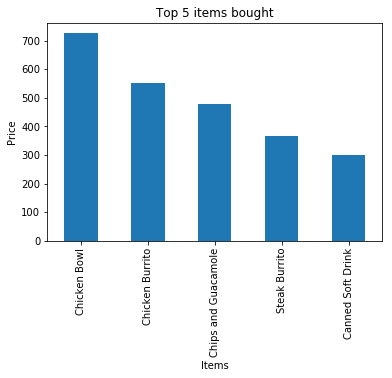

In [28]:
plt.figure()
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Top 5 items bought')


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [31]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [34]:
#Replace $ and change type to float
chipo = pd.read_csv(url, sep='\t')
chipo['item_price'] = chipo['item_price'].str.replace('$', '')
chipo['item_price'] = chipo['item_price'].astype(float)

In [43]:
#chipo.groupby('order_id')['quantity'].sum() create series so avoid using quanity. You need dataframe to plot it
orders = chipo.groupby('order_id').sum()
orders.head(5)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [45]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 1 to 1834
Data columns (total 2 columns):
quantity      1834 non-null int64
item_price    1834 non-null float64
dtypes: float64(1), int64(1)
memory usage: 43.0 KB


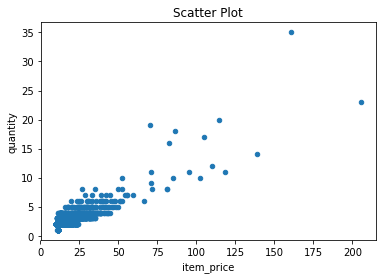

In [47]:
orders.plot(kind='scatter', x='item_price', y='quantity', title='Scatter Plot')

### Step 7. BONUS: Create a question and a graph to answer your own question.